<a href="https://colab.research.google.com/github/yohanesnuwara/python-bootcamp-for-geoengineers/blob/master/petroweek_notebooks/petroweek2020_unit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 2 Python for Exploration: Petrophysical Analysis of Well Log Data

As usual, import the three core libraries of Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Stream data directly into Google Colab: Dutch F3 logs

Data is often stored in a website. In Colab, we can stream directly from the website **without downloading it into our PC**. We use `!wget`.



In [ ]:
!wget 'https://github.com/yohanesnuwara/python-bootcamp-for-geoengineers/blob/master/data/Dutch_F3_Logs.zip?raw=true'

--2020-08-30 07:32:54--  https://github.com/yohanesnuwara/python-bootcamp-for-geoengineers/blob/master/data/Dutch_F3_Logs.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yohanesnuwara/python-bootcamp-for-geoengineers/raw/master/data/Dutch_F3_Logs.zip [following]
--2020-08-30 07:32:55--  https://github.com/yohanesnuwara/python-bootcamp-for-geoengineers/raw/master/data/Dutch_F3_Logs.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yohanesnuwara/python-bootcamp-for-geoengineers/master/data/Dutch_F3_Logs.zip [following]
--2020-08-30 07:32:55--  https://raw.githubusercontent.com/yohanesnuwara/python-bootcamp-for-geoengineers/master/data/Dutch_F3_Logs.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 

A new file will then be downloaded under `/content`. The name of the file is still `.zip?raw=true`. We must rename it first to `.zip`.

Then do unzipping.

In [ ]:
!unzip '/content/Dutch_F3_Logs.zip'

Archive:  /content/Dutch_F3_Logs.zip
   creating: Dutch_F3_Logs/
  inflating: Dutch_F3_Logs/F02-1_logs.las  
  inflating: Dutch_F3_Logs/F02-1_markers.txt  
  inflating: Dutch_F3_Logs/F03-2_logs.las  
  inflating: Dutch_F3_Logs/F03-2_markers.txt  
  inflating: Dutch_F3_Logs/F03-4_logs.las  
  inflating: Dutch_F3_Logs/F03-4_markers.txt  
  inflating: Dutch_F3_Logs/F06-1_logs.las  
  inflating: Dutch_F3_Logs/F06-1_markers.txt  


Copy, paste, and define the file path of each log (there are 4 logs)

In [ ]:
F021_path = '/content/Dutch_F3_Logs/F02-1_logs.las'
F032_path = '/content/Dutch_F3_Logs/F03-2_logs.las'
F034_path = '/content/Dutch_F3_Logs/F03-4_logs.las'
F061_path = '/content/Dutch_F3_Logs/F06-1_logs.las'

## Read log data

First, we will install a specific Python library for well-log data, called `lasio`. Google Colab doesn't have `lasio`, so we need to do `!pip install`

In [ ]:
!pip install lasio

Then import the library (as usual)

In [ ]:
import lasio

You already have the filepaths, then you can directly read them using `lasio`. Use `lasio.read`

In [ ]:
F021 = lasio.read(F021_path)
F032 = lasio.read(F032_path)
F034 = lasio.read(F034_path)
F061 = lasio.read(F061_path)

Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.


Don't worry if you get messages about "header section", you're all set now. 

Next, take a look at what logs are available in the log, by passing `.keys()`

In [ ]:
F021.keys()

['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE']

What units are used by each log? Pass: `.curves`

In [ ]:
F021.curves

[CurveItem(mnemonic=DEPTH, unit=M, value=, descr=1     DEPTH, original_mnemonic=DEPTH, data.shape=(9680,)),
 CurveItem(mnemonic=RHOB, unit=kg/m3, value=, descr=2     Density, original_mnemonic=RHOB, data.shape=(9680,)),
 CurveItem(mnemonic=DT, unit=us/m, value=, descr=3     Sonic, original_mnemonic=DT, data.shape=(9680,)),
 CurveItem(mnemonic=GR, unit=API, value=, descr=4     Gamma Ray, original_mnemonic=GR, data.shape=(9680,)),
 CurveItem(mnemonic=AI, unit=m/s)*(kg/m3, value=, descr=5     P-Impedance, original_mnemonic=AI, data.shape=(9680,)),
 CurveItem(mnemonic=AI_REL, unit=m/s)*(kg/m3, value=, descr=6     P-Impedance_rel, original_mnemonic=AI_REL, data.shape=(9680,)),
 CurveItem(mnemonic=PHIE, unit=fraction, value=, descr=7     Porosity, original_mnemonic=PHIE, data.shape=(9680,))]

## Visualize well log curve (Example: F021 log)

Do you still remember how to get a data from one row in Pandas? For example we have a dataframe called `df` and column name we want to retrieve is `name`. To get the data, we pass: `df['name']`

Same thing applies here. Our well name is `F021`, as our dataframe. The column name that we want to get is `RHOB`, so we pass: `F021['RHOB']`. So, we get RHOB data. 

Now, get all the data.

In [ ]:
depth = F021['DEPTH']
rhob = F021['RHOB']
dt = F021['DT']
gr = F021['GR']
ai = F021['AI']
phie = F021['PHIE']

Next, using matplotlib `plt.subplots` that we have learnt, we'll visualize the logs side-to-side. 

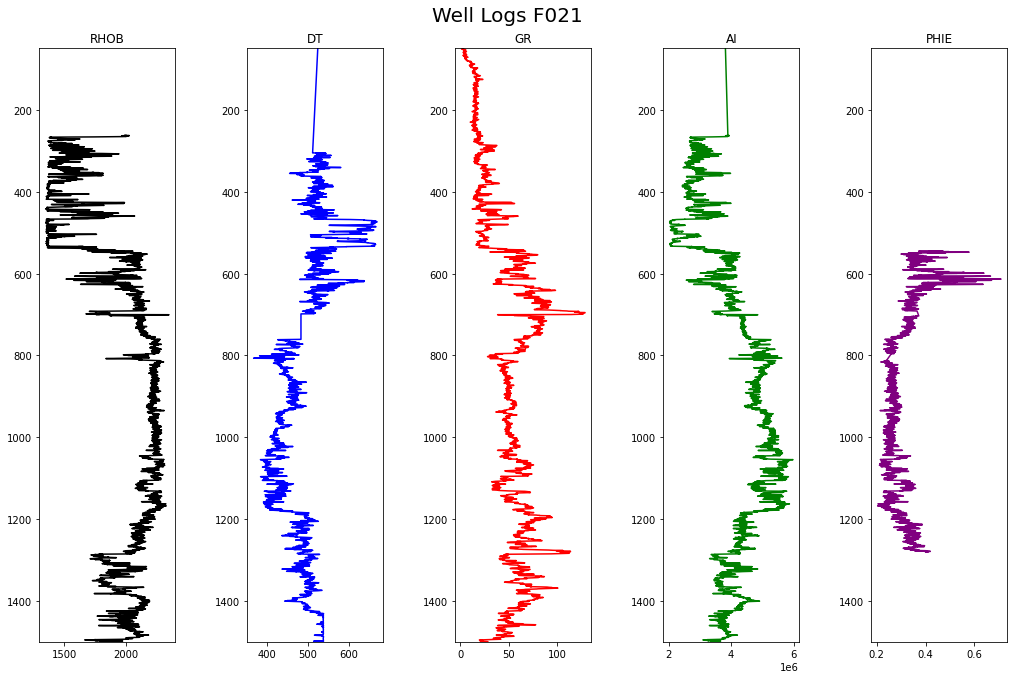

In [ ]:
plt.figure(figsize=(15,10))

plt.suptitle('Well Logs F021', size=20)

plt.subplot(1,5,1)
plt.plot(rhob, depth, color='black')
plt.ylim(max(depth), min(depth))
plt.title('RHOB')

plt.subplot(1,5,2)
plt.plot(dt, depth, color='blue')
plt.ylim(max(depth), min(depth))
plt.title('DT')

plt.subplot(1,5,3)
plt.plot(gr, depth, color='red')
plt.ylim(max(depth), min(depth))
plt.title('GR')

plt.subplot(1,5,4)
plt.plot(ai, depth, color='green')
plt.ylim(max(depth), min(depth))
plt.title('AI')

plt.subplot(1,5,5)
plt.plot(phie, depth, color='purple')
plt.ylim(max(depth), min(depth))
plt.title('PHIE')

# set space between logs
plt.tight_layout(4) 
plt.show()

## Basic Petrophysical Analysis

### Crossploting Logs

Let's do crossplot of logs. Here we use the "scatter method" in Matplotlib: `plt.scatter`

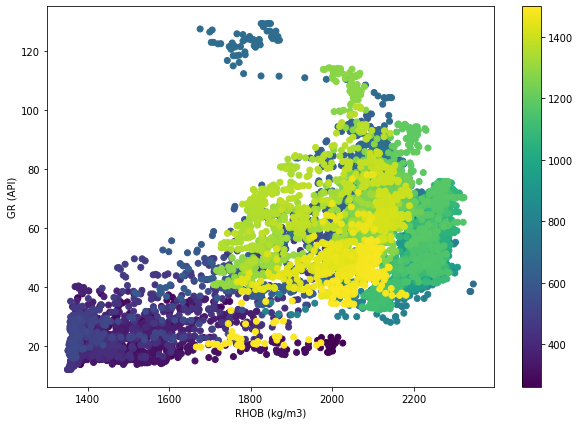

In [ ]:
plt.figure(figsize=(10,7))

plt.scatter(rhob, gr, c=depth)

plt.xlabel('RHOB (kg/m3)')
plt.ylabel('GR (API)')
plt.colorbar()
plt.show()

### Convert DT log to VP log

Our DT data has unit of $\mu s/m$. We'd like to convert it to a velocity unit, thus VP log, with unit of $m/s$. Then display the converted log

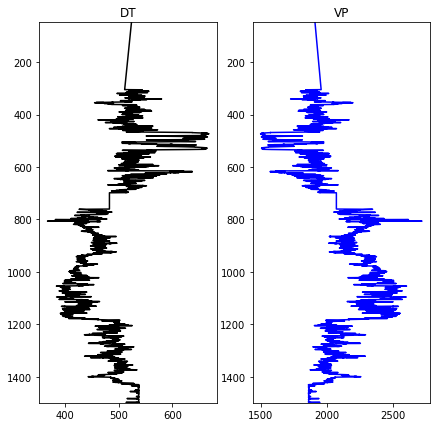

In [ ]:
# convert DT to VP
vp = 1E+06 / dt 

# display the converted log
plt.figure(figsize=(7,7))

plt.subplot(1,2,1)
plt.plot(dt, depth, color='black')
plt.ylim(max(depth), min(depth))
plt.title('DT')

plt.subplot(1,2,2)
plt.plot(vp, depth, color='blue')
plt.ylim(max(depth), min(depth))
plt.title('VP')

plt.show()

### Produce VSHALE log from GR

We calculate shale volume (VSH) using Gamma Ray (GR), by this formula:

$$VSH=\frac{GR-GR_{min}}{GR_{max}-GR_{min}}$$

First, we need to detect if there is NaN in our data. In this calculation, we need the min and max value of GR. 

In [ ]:
np.min(gr), np.max(gr)

(nan, nan)

The result above shows there's NaN in our data, meaning that we need to handle them first. **Removing NaN is not preferrable**, so we could replace the NaN value with the average value of the data. This is what we call **IMPUTATION**.

The imputation function has been provided to you as follows. 

In [ ]:
def fillna(log):
  """
  Replace (Impute) NaN values with Average Values
  """
  log_nan_remove = log[~np.isnan(log)]
  mean = np.mean(log_nan_remove)
  log[np.isnan(log)] = mean
  return log

Let's impute or data

In [ ]:
gr_imputed = fillna(gr)

So, when we compute the min and max value, it won't return NaN anymore, and all set to go. 

In [ ]:
np.min(gr), np.max(gr)

(1.3392, 129.1773)

Now we can produce VSH log using the above formula

In [ ]:
gr_min = np.min(gr_imputed)
gr_max = np.max(gr_imputed)

vsh = (gr_imputed - gr_min) / (gr_max - gr_min)

Let's display the created VSH log

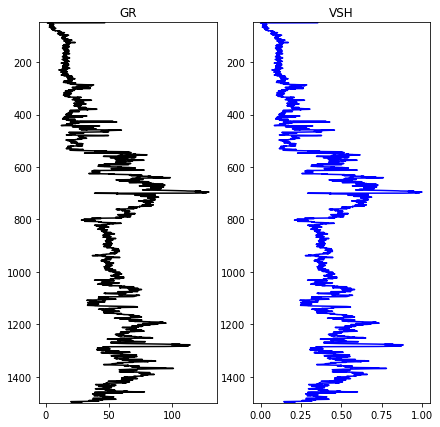

In [ ]:
# display the converted log
plt.figure(figsize=(7,7))

plt.subplot(1,2,1)
plt.plot(gr, depth, color='black')
plt.ylim(max(depth), min(depth))
plt.title('GR')

plt.subplot(1,2,2)
plt.plot(vsh, depth, color='blue')
plt.ylim(max(depth), min(depth))
plt.title('VSH')

plt.show()

### Produce DPHI (Density Porosity) from RHOB

Here we assume that the entire log represents the same lithology composed of sandstone matrix and filled by brine. Calculate DPHI from RHOB using this formula:

$$DPHI=\frac{\rho_{ma}-RHOB}{\rho_{ma}-\rho_f}$$

Hence, matrix density is assumed 2.67 g/cc and fluid density is assumed 1 g/cc. In addition, we should convert our RHOB log unit from kg/m3 to g/cc.

In [ ]:
denma = 2.67 # g/cc
rhof = 1

# convert RHOB from kg/m3 to g/cc unit
rhob_converted = rhob * 0.001

dphi = (denma - rhob_converted) / (denma - rhof)

Let's display the created DPHI log.

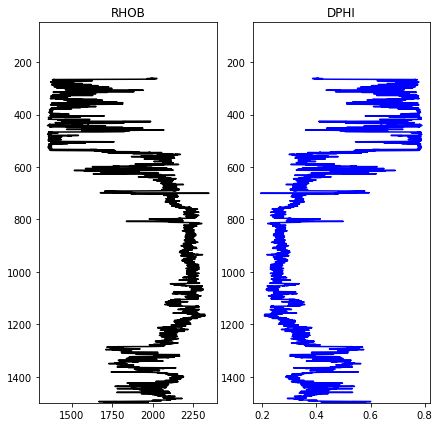

In [ ]:
# display the converted log
plt.figure(figsize=(7,7))

plt.subplot(1,2,1)
plt.plot(rhob, depth, color='black')
plt.ylim(max(depth), min(depth))
plt.title('RHOB')

plt.subplot(1,2,2)
plt.plot(dphi, depth, color='blue')
plt.ylim(max(depth), min(depth))
plt.title('DPHI')

plt.show()

Look at the above DPHI log. The upper and lower part of the log has porosity higher than 45%. Still remember that porosity never exceed 45% (ideal porosity)? Therefore, our assumption can't be used for that zones, and hence, lithological and fluid correction must be done (beyond the scope of this training). 

### Multiple Crossplot of Logs

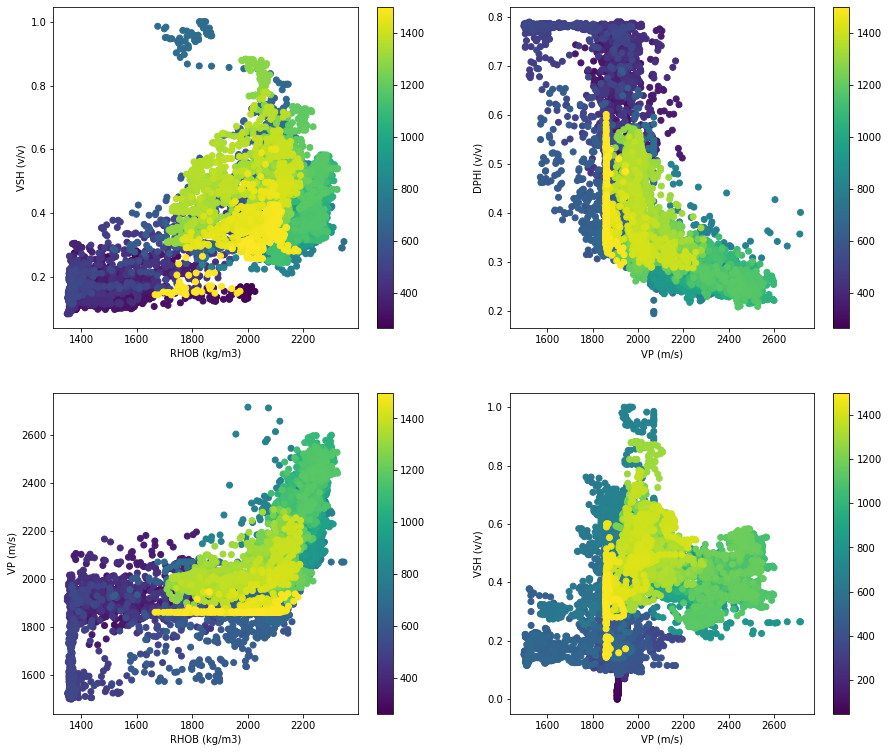

In [ ]:
plt.figure(figsize=(15,13))

plt.subplot(2,2,1)
plt.scatter(rhob, vsh, c=depth)
plt.xlabel('RHOB (kg/m3)'); plt.ylabel('VSH (v/v)')
plt.colorbar()

plt.subplot(2,2,2)
plt.scatter(vp, dphi, c=depth)
plt.xlabel('VP (m/s)'); plt.ylabel('DPHI (v/v)')
plt.colorbar()

plt.subplot(2,2,3)
plt.scatter(rhob, vp, c=depth)
plt.xlabel('RHOB (kg/m3)'); plt.ylabel('VP (m/s)')
plt.colorbar()

plt.subplot(2,2,4)
plt.scatter(vp, vsh, c=depth)
plt.xlabel('VP (m/s)'); plt.ylabel('VSH (v/v)')
plt.colorbar()

plt.show()

### Optional: Pairplots

Pairplot is a powerful technique to look at how the log data is **distributed** and **correlated**. We use `seaborn` library to do so. 

Because Google Colab already had `seaborn`, we can directly import it. 

In [ ]:
import seaborn as sns

In [ ]:
well_df = pd.DataFrame({'RHOB': rhob, 'DT': dt, 'GR': gr, 'AI': ai, 'PHIE': phie})
depth_df = pd.DataFrame({'DEPTH': depth})
well_df

,RHOB,DT,GR,AI,PHIE
0,NaN,524.0485,46.613531,3820257.00,NaN
1,NaN,524.0410,46.613531,3820311.75,NaN
2,NaN,524.0336,46.613531,3820366.25,NaN
3,NaN,524.0262,46.613531,3820419.75,NaN
4,NaN,524.0190,46.613531,3820472.25,NaN
...,...,...,...,...,...
9675,1787.5444,532.1727,27.627300,3359011.00,NaN
9676,1814.1691,534.8610,28.528100,3391772.00,NaN
9677,1861.6497,537.1902,28.581300,3465524.00,NaN
9678,1880.3978,537.2630,28.581300,3499957.75,NaN


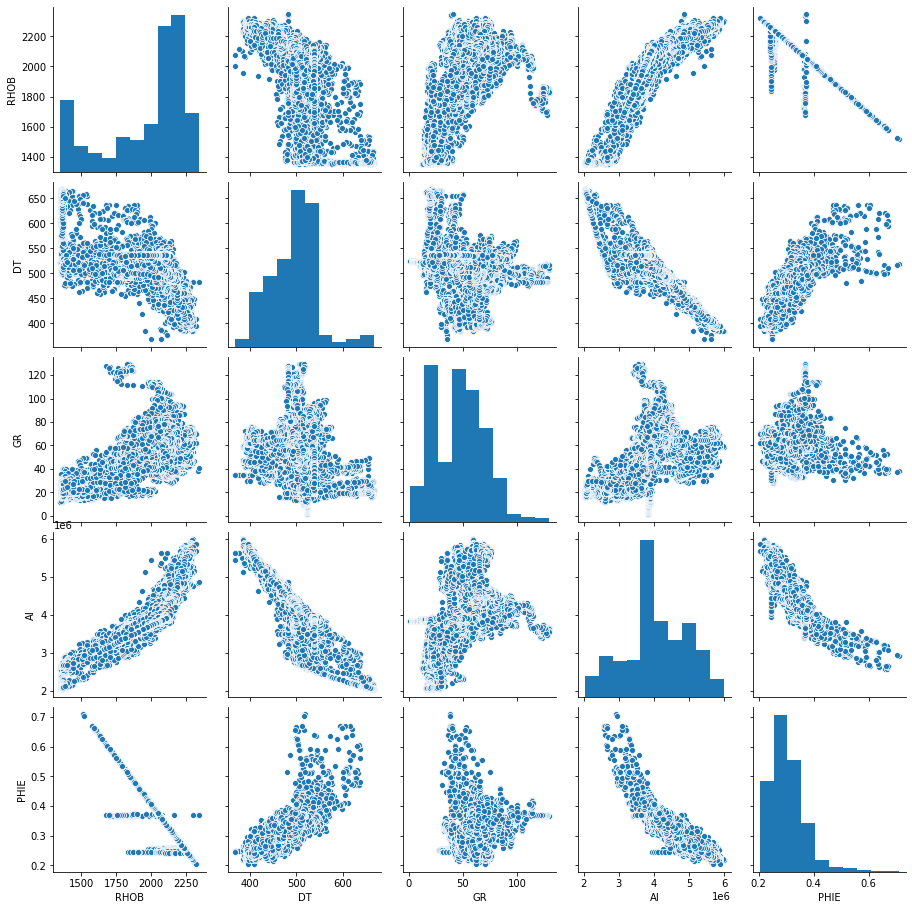

In [ ]:
sns.pairplot(well_df)
plt.show()